<a href="https://colab.research.google.com/github/milashu7/Module_2/blob/main/Proect_EDA_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations
from scipy.stats import ttest_ind

### добиться автоматической загрузки файла без мануального режима
from google.colab import files
uploaded = files.upload()  

data_origin = pd.read_csv('stud_math.xls')
data_origin.sample(5)

Saving stud_math.xls to stud_math (2).xls


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
263,GP,F,17,U,GT3,T,3.0,3.0,other,other,NaN,mother,1.0,3.0,0.0,no,no,NaN,yes,no,-9.0,yes,no,no,3.0,2.0,3.0,4.0,4.0,45.0
203,GP,F,17,R,GT3,T,2.0,2.0,other,other,reputation,mother,1.0,1.0,0.0,no,yes,no,no,yes,-3.0,yes,yes,no,5.0,3.0,2.0,3.0,18.0,30.0
141,GP,M,16,U,LE3,T,2.0,2.0,services,services,reputation,father,2.0,1.0,2.0,no,yes,no,NaN,yes,-3.0,yes,NaN,no,2.0,3.0,3.0,2.0,8.0,45.0
237,GP,F,16,U,NaN,T,2.0,1.0,other,other,home,mother,1.0,1.0,0.0,no,NaN,no,no,yes,-3.0,yes,yes,yes,4.0,5.0,2.0,5.0,20.0,60.0
120,GP,F,15,U,GT3,T,1.0,2.0,at_home,NaN,course,mother,1.0,2.0,0.0,no,no,no,no,no,-6.0,yes,yes,no,3.0,2.0,3.0,1.0,NaN,75.0


In [81]:
# переименование colomns для удобства
data_origin.columns = ['school', 'sex', 'age', 'address', 'fam_size', 'p_status', 
                'm_edu', 'f_edu', 'm_job', 'f_job', 'reason', 'guardian', 
                'travel_time', 'study_time', 'failures', 
                'school_sup', 'fam_sup', 'paid', 'activities', 
                'nursery', 'study_time_granular', 'higher', 
                'internet', 'romantic', 'fam_rel', 'free_time',
                'go_out',	'health',	'absences', 'score']                 

data = data_origin.copy()
display(data.head(10))
data.info()
# data.describe()
# data.head()
# data.info

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,study_time_granular,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   fam_size             368 non-null    object 
 5   p_status             350 non-null    object 
 6   m_edu                392 non-null    float64
 7   f_edu                371 non-null    float64
 8   m_job                376 non-null    object 
 9   f_job                359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  travel_time          367 non-null    float64
 13  study_time           388 non-null    float64
 14  failures             373 non-null    float64
 15  school_sup           386 non-null    obj

**1.	Первичная обработка данных.** Оценка количества уникальных значений для номинативных переменных

    school
GP     349
MS      46
Ненулевых значений   395  из  395  =  100.0 %
Уникальных значений   2
   sex
F  208
M  187
Ненулевых значений   395  из  395  =  100.0 %
Уникальных значений   2
   address
U      295
R       83
Ненулевых значений   378  из  395  =  95.7 %
Уникальных значений   2
     fam_size
GT3       261
LE3       107
Ненулевых значений   368  из  395  =  93.16 %
Уникальных значений   2
   p_status
T       314
A        36
Ненулевых значений   350  из  395  =  88.61 %
Уникальных значений   2
          m_job
other       133
services     98
at_home      58
teacher      55
health       32
Ненулевых значений   376  из  395  =  95.19 %
Уникальных значений   5
          f_job
other       197
services    102
teacher      29
at_home      16
health       15
Ненулевых значений   359  из  395  =  90.89 %
Уникальных значений   5
            reason
course         137
home           104
reputation     103
other           34
Ненулевых значений   378  из  395  =  95.7 %
Уникальных зна

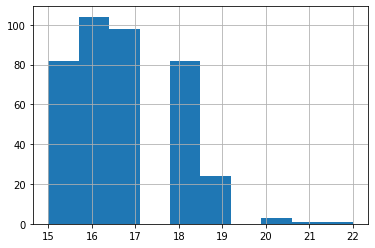

m_edu
Ненулевых значений   392  из  395  =  99.24 %
Уникальных значений   5


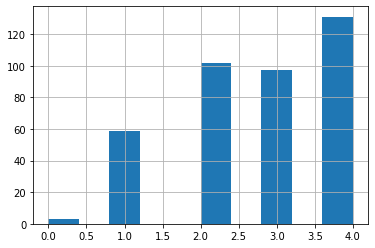

f_edu
Ненулевых значений   371  из  395  =  93.92 %
Уникальных значений   6


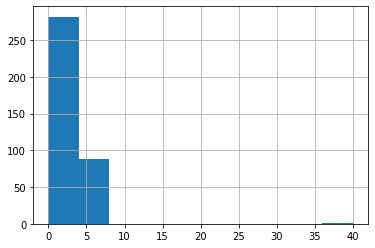

travel_time
Ненулевых значений   367  из  395  =  92.91 %
Уникальных значений   4


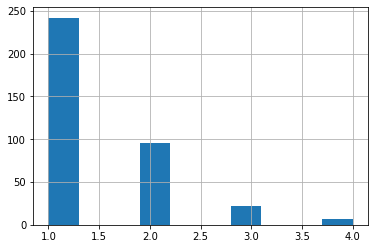

study_time
Ненулевых значений   388  из  395  =  98.23 %
Уникальных значений   4


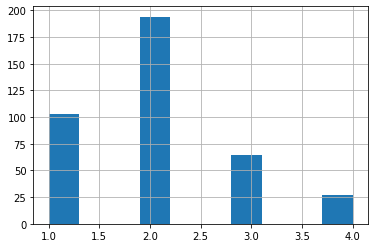

failures
Ненулевых значений   373  из  395  =  94.43 %
Уникальных значений   4


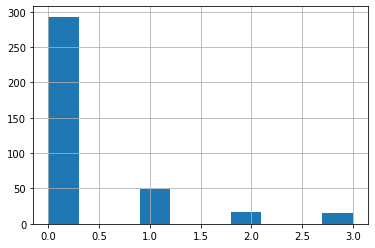

study_time_granular
Ненулевых значений   388  из  395  =  98.23 %
Уникальных значений   4


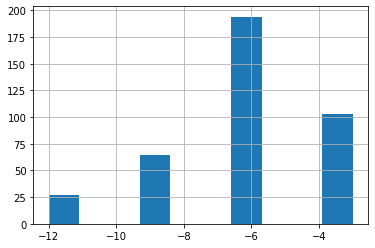

fam_rel
Ненулевых значений   368  из  395  =  93.16 %
Уникальных значений   6


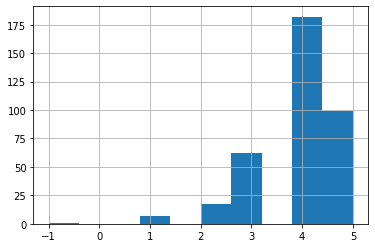

free_time
Ненулевых значений   384  из  395  =  97.22 %
Уникальных значений   5


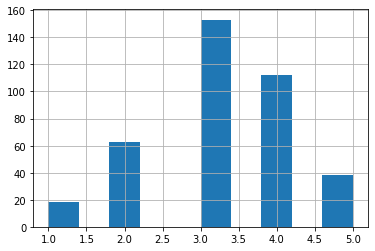

go_out
Ненулевых значений   387  из  395  =  97.97 %
Уникальных значений   5


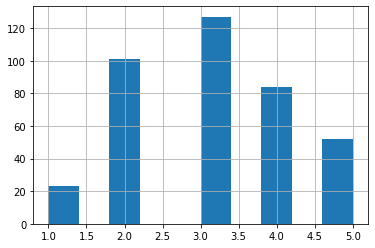

health
Ненулевых значений   380  из  395  =  96.2 %
Уникальных значений   5


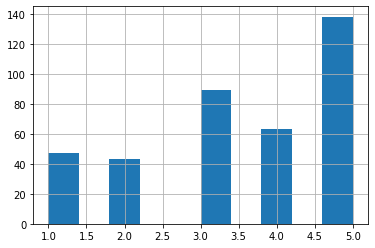

absences
Ненулевых значений   383  из  395  =  96.96 %
Уникальных значений   36


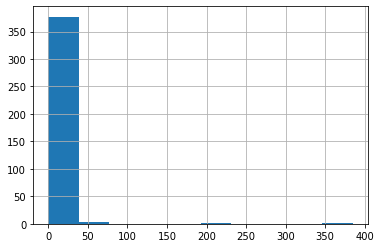

score
Ненулевых значений   389  из  395  =  98.48 %
Уникальных значений   18


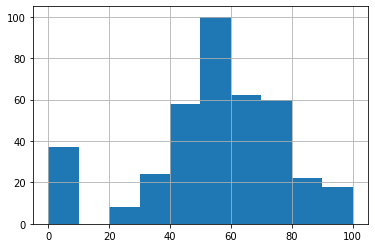

In [82]:
# Сформируем два списка  - количественные и качественные переменные
# Отображение: для количественных - гистограммы, для качественных - value_counts()

def first_view(df):
    list_num =[]
    list_qual = []
    
    for col in df:
        if df[col].dtypes == 'object':
            list_num.append(col)
        else:
            list_qual.append(col)
    
    # print(list_num)
    # print(list_qual)
        
    for name1 in list_num:
        print(pd.DataFrame(df[name1].value_counts()))
        print('Ненулевых значений  ', df[name1].value_counts().sum(),' из ', str(len(data)),' = ', round(100*df[name1].value_counts().sum()/len(data),2), '%' )
        print('Уникальных значений  ', df[name1].nunique())
    for name2 in list_qual:
        print(name2)
        df[name2].hist()
        print('Ненулевых значений  ', df[name2].value_counts().sum(),' из ', str(len(data)),' = ', round(100*df[name2].value_counts().sum()/len(data),2), '%' )
        print('Уникальных значений  ', df[name2].nunique())
        plt.show()

first_view(data)

Альтернативный способ нахождения числовых и нечисловых столбцов:

In [ ]:
# отбор числовых колонок
data_numeric = data.select_dtypes(include=[np.number])
numeric_cols = data_numeric.columns.values
# print(numeric_cols)

# отбор нечисловых колонок
data_non_numeric = data.select_dtypes(exclude=[np.number])
non_numeric_cols = data_non_numeric.columns.values
# print(non_numeric_cols)


Выводы: анализируя предварительно данные можно сделать следующие заключения:
1. имеем лишь несколько наборов полных данных (age/возраст, sex/пол, school/аббревиатура школы), все остальные переменные имеют пропуски в данных. Данные имеют пропуски в пределах 10% от всей выборки, наибольшие значения пропусков наблюдаем по переменным p_status (100%-88.61%=11.39%) и paid(100%-89.87%=10.13%).
2. гипотеза: ряд переменных содержат выбросы - так, например, f_edu/образование отца ожидаемые значения согласно описанию к данным в диапазоне 0..4, однако имеются значения вне диапазона (f_edu=40);
fam_rel/семейные отношения ожидаемые значение 1..5, однако имеем значения вне указанного диапазона (fam_rel<0).
3. обнаружена переменная study_time_gran, которая не имеет описания к набору данных. Исключим пока её из рассмотрения в блоке основного анализа и вернёмся к ней при обобщении результатов (возможно это значимый столбец данных). 

**2.	Распределение признака для числовых переменных, устранение выбросов.**


В ходе выполнения п.1 выявлены следующие числовые переменные (по типу данных):
age, m_edu, f_edu, travel_time, study_time, failures, fam_rel, free_time, go_out, health, absences, score.
Они все имеют (кроме age) нулевые значения.
Анализу на выбросы стоит подвергнуть не все переменные, а лишь f_edu, fam_rel, absences, score, которые либо как уже установлено имееют выбросы либо могут иметь их.
Постараемся объединить фильтрацию по нулевым значениям признака с поиском выбросов.

Для фильтрации выбросов по переменным: 
- f_edu и fam_rel воспользуемся определением диапазона значений из описания набора данных;
- adsences и score - оценкой межквартильного размаха.

Фильтрация выбросов по признаку f_edu:

In [83]:
#display(data.f_edu.head(30))
nul_f_edu = data.f_edu.isnull().sum()
print('Число нулевых значений -  ',nul_f_edu) 
data.f_edu.value_counts()

Число нулевых значений -   24


2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: f_edu, dtype: int64

Очевидно, что по признаку f_edu присутствует один выброс (значение = 40). Вероятнее всего, это ошибка ввода данных. Подтвердим это предположение гистограммой.

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: f_edu, dtype: float64

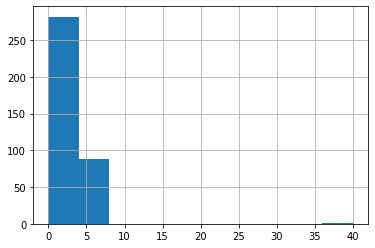

In [84]:
data.f_edu.hist()
data.f_edu.describe()

По признаку  f_edu удалено:
число нулевых значений -  24
число выбросов -  1


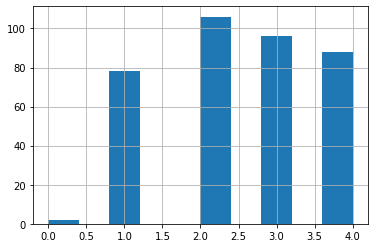

In [85]:
# Delete null values and outliners
print('По признаку  f_edu удалено:')
print('число нулевых значений - ', nul_f_edu)

data = data.loc[(data.f_edu <= 4)&(data.f_edu>=0)]
# display(data)

print('число выбросов - ', str(data_origin.f_edu.value_counts().sum()- len(data)))
data.f_edu.hist()
data.f_edu.describe()
n_data = len(data)
# print(n_data)

Фильтрация выбросов по признаку fam_rel:

In [86]:
# display(data.fam_rel.head(30))
nul_fam_rel = data.fam_rel.isnull().sum()
print('Число нулевых значений -  ', nul_fam_rel) 
data.fam_rel.value_counts()

Число нулевых значений -   24


 4.0    168
 5.0     95
 3.0     59
 2.0     16
 1.0      7
-1.0      1
Name: fam_rel, dtype: int64

Очевидно, что по признаку fam_rel  один выброс (значение = 40). Вероятнее всего, это ошибка ввода данных. Подтвердим это предположение гистограммой.

count    346.000000
mean       3.936416
std        0.939629
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: fam_rel, dtype: float64

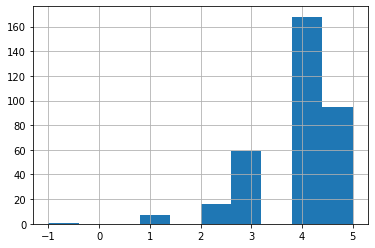

In [87]:
data.fam_rel.hist()
data.fam_rel.describe()

По признаку  fam_rel удалено:
число нулевых значений -  24
число выбросов -  1
345


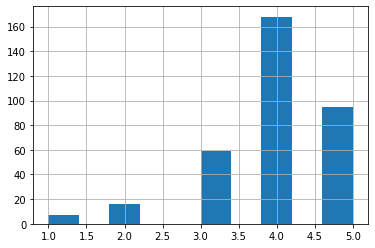

In [88]:
# Delete null values and outliners
print('По признаку  fam_rel удалено:')
print('число нулевых значений - ', nul_fam_rel)

data = data.loc[(data.fam_rel <= 5)&(data.fam_rel>=1)]

print('число выбросов - ', str(n_data - nul_fam_rel-len(data)))
data.fam_rel.hist()
data.fam_rel.describe()
n_data = len(data)
print(n_data)

Фильтрация выбросов по признаку absences:

Число нулевых значений -   12


count    333.000000
mean       7.315315
std       24.755302
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

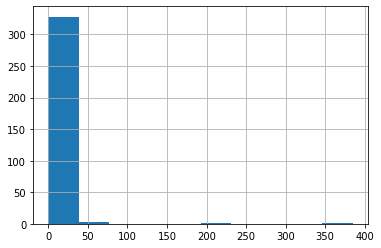

In [89]:
nul_absences = data.absences.isnull().sum()
print('Число нулевых значений -  ', nul_absences) 
data.absences.value_counts()
data.absences.hist()
data.absences.describe()

Замечаем, что переменная absences имеет не только 12 пустых значений, а и выбросы. Удалим из датасета и пустые значения и выбросы, намеренно заменяя пустые значения выбросами, скажем значением -999, что намного меньше min = 0. Тогда за один проход получим чистые значения

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].
По признаку  absences число выбросов -  27


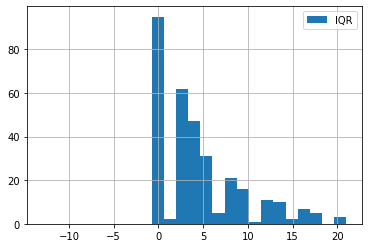

In [90]:
# Delete null values and outliners
data.absences =  data.absences.fillna(-999)

median = data.absences.median()
IQR = data.absences.quantile(0.75) - data.absences.quantile(0.25)
perc25 = data.absences.quantile(0.25)
perc75 = data.absences.quantile(0.75)
l = perc25 - 1.5*IQR
r = perc75 + 1.5*IQR
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=l, l=r))

v = n_data - len(data[data.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)])
print('По признаку  absences число выбросов - ', str(v))

data = data[data.absences.between(perc25-1.5*IQR,perc75+1.5*IQR)]
data.absences.hist(bins = 25, range = (perc25 - 1.5*IQR-1, perc75 + 1.5*IQR+1), label = 'IQR')
plt.legend();


Фильтрация выбросов по признаку score:

In [91]:
# display(data.score.head(30))
nul_score = data.score.isnull().sum()
print('Число нулевых значений -  ', nul_score) 
data.score.value_counts()

Число нулевых значений -   5


50.0     50
55.0     38
0.0      30
65.0     27
75.0     25
60.0     25
70.0     23
40.0     22
45.0     17
80.0     16
30.0     13
90.0      8
35.0      8
25.0      5
85.0      3
95.0      2
100.0     1
Name: score, dtype: int64

count    313.000000
mean      52.124601
std       22.511546
min        0.000000
25%       45.000000
50%       55.000000
75%       65.000000
max      100.000000
Name: score, dtype: float64

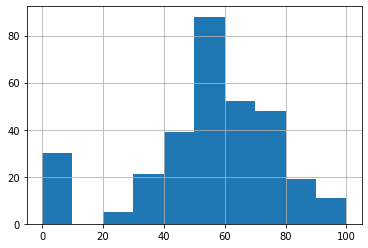

In [92]:
data.score.hist()
data.score.describe()

Замечаем, что данные по переменной score содержат 5 пустых значений, и возможные выбросы в диапазоне от 0..20, оценивая среднее значение, стандартное отклонение и значение квартилей. Проверим эту гипотезу методом межквартильного размаха.


25-й перцентиль: 40.0, 75-й перцентиль: 65.0, IQR: 65.0,  Границы выбросов: [-57.5, 162.5].
По признаку  score число выбросов -  32


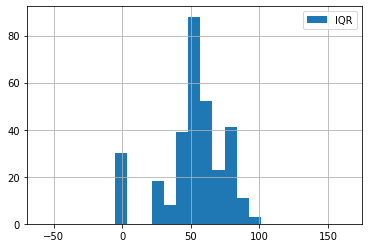

In [93]:
# Delete null values and outliners
data.score =  data.score.fillna(-999)

median = data.score.median()
IQR = data.score.quantile(0.75) - data.absences.quantile(0.25)
perc25 = data.score.quantile(0.25)
perc75 = data.score.quantile(0.75)
l = perc25 - 1.5*IQR
r = perc75 + 1.5*IQR
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=l, l=r))

v = n_data - len(data[data.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)])
print('По признаку  score число выбросов - ', str(v))

data = data[data.score.between(perc25-1.5*IQR,perc75+1.5*IQR)]
data.score.hist(bins = 25, range = (perc25 - 1.5*IQR-1, perc75 + 1.5*IQR+1), label = 'IQR')
plt.legend();

Получили в качестве выбросов - пустые данные, подозрительный на выбросы диапазон 0..20 не подтвердился методом межквартильного размаха.

**3.	Проведение корреляционного анализа количественных переменных**

Для коррреляционного анализа выбрала переменные age, m_edu, f_edu и score. Все переменные (кроме m_edu) прошли обработку. Посмотрим на данные в колонке m_edu требуется ли очистка этих данных?!

In [62]:
data_corr = data[['age' , 'm_edu', 'f_edu', 'score']]
display (len(data_corr))
for col in data_corr.columns:
    pct_missing = np.mean(data_corr[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

313

age - 0.0%
m_edu - 1.0%
f_edu - 0.0%
score - 0.0%


Данные m_edu содержат пустые значения. Проведём их очистку и проверку.

In [63]:
data_corr = data_corr[~data_corr.m_edu.isnull()]
display(len(data_corr))
for col in data_corr.columns:
    pct_missing = np.mean(data_corr[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

310

age - 0.0%
m_edu - 0.0%
f_edu - 0.0%
score - 0.0%


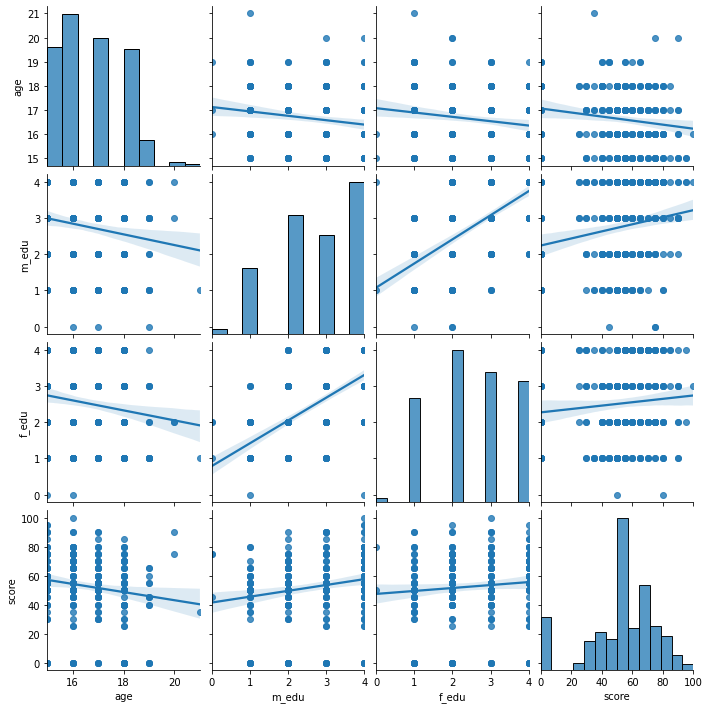

In [44]:
sns.pairplot(data_corr, kind = 'reg')

In [64]:
data_corr.describe()   
data_corr.corr(method ='pearson')

,age,m_edu,f_edu,score
age,1.000000,-0.155972,-0.178627,-0.148777
m_edu,-0.155972,1.000000,0.644265,0.198240
f_edu,-0.178627,0.644265,1.000000,0.108119
score,-0.148777,0.198240,0.108119,1.000000


Выводы по корреляции:
1. Согласно результатов корреляционного анализа коррелированных переменных в датасете не обнаружено, это означает, что все выбранные переменные пригодны для построения модели.
2. Значение корреляции 0.64 между переменными m_edu и f_edu может говорить о том, что образование родителей в большинстве примерно равное. Что достаточно интуитивно понятно согласно здравому смыслу.

**4. Анализ номинативных переменных** и устранение тех, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).


In [94]:
def get_stat_dif(column):
    cols = data.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data.loc[data.loc[:, column] == comb[0], 'score'], 
                        data.loc[data.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


for col in ['school', 'sex', 'address', 'fam_size', 'p_status', 'm_job', 
            'f_job', 'reason', 'guardian', 'school_sup', 'fam_sup', 'paid', 
            'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)   

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher


In [ ]:
data_for_model = data.loc[:, ['address', 'paid', 'higher','age' , 'm_edu', 'f_edu', 'score']]
data_for_model.head(40)

Выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели:
переменные по признаку paid небыли обработаны ранее (имеют нулевые значения), требуется произвести их очистку.

In [99]:
data_for_model = data_for_model[~data_for_model.paid.isnull()]
data_for_model = data_for_model[~data_for_model.address.isnull()]
data_for_model = data_for_model[~data_for_model.higher.isnull()]
data_for_model.head(40)
#print(len(data_for_model))

257


# Новый раздел

Итак, в результате EDA анализа влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике получены следующие выводы:

1. В данных достаточно мало пустых значений. Данные имеют пропуски в пределах 10% от всей выборки, наибольшие значения пропусков наблюдаем по переменным p_status (11.39%) и paid(10.13%).

2. Выбросы найдены только в столбцах f_edu и fam_rel, что позволяет сделать вывод о том, что данные достаточно чистые.

3. Достаточно хорошо коррелированных числовых признаков  не выявлено.

4. Обнаружена переменная study_time_gran, которая не имеет описания к набору данных. Исключила  её из рассмотрения в блоке основного анализа. Можно вернутся к ней при уточнении описания к датасету (возможно это значимый столбец данных).

5. Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это address, paid, higher, age, m_edu, f_edu и score.